## MultiClass Classification - Emotions Detection from Tweets Data

## Table of Content
- Data Source
- Data Description
- Goal
- Importing Packages and Loading Data
- EDA and Feature Engineering
- Text Preprocessing
- Multi-Classification Models
    - Spliting the data: train and test
    - Models
- Comparison of models performance
- Model Evaluation
    - Precision, Recall, F1-Score
    - Confusion Matrix
- Predictions
- Pipeline

### Data Source: 
Public Dataset download from **kaggle** : 
[Emotion Detection from Text](https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text?select=tweet_emotions.csv)

### Data Description:
The data is basically a collection of tweets annotated with the emotions behind them. We have three columns 
- `tweet_id`
- `sentiment`
- `content`  

In `content`, we have the raw tweet. In `sentiment`, we have the emotion behind the tweet.

### Goal:
Emotion detection from text is one of the challenging problems in NLP. Humans have a variety of emotions and it is difficult to collect enough records for each emotion. Here we have a labeled data for emotion detection and the objective is to build an efficient model to detect emotion.

### Importing Packages and Loading the datset

In [199]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import opendatasets as od
pd.set_option('display.max_colwidth', -1)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [17]:
url = "https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text"
# od.download(url)

In [2]:
df = pd.read_csv('dataset/tweet_emotions.csv')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
# drop `tweet_id` column
df.drop('tweet_id', axis=1, inplace=True)

In [52]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [8]:
df.shape
# total 40000 rows and 2 columns

(40000, 2)

In [6]:
# Descriptive view of the categorical column
df.sentiment.describe()

count       40000
unique         13
top       neutral
freq         8638
Name: sentiment, dtype: object

In [7]:
# all the unique values of sentiment along with their count
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

### EDA and Feature Engineering

In [17]:
df.isna().sum()
# There is no missing values in any row

sentiment    0
content      0
dtype: int64

In [18]:
df.duplicated().sum()
# There is total 91 duplicated values in the dataset

91

In [20]:
# drop all the duplicate values
df.drop_duplicates(ignore_index=True, inplace=True)

In [21]:
df.duplicated().sum()
# There is total 91 duplicated values in the dataset

0

In [30]:
# add new column which stores total number of characters in each tweet
print(df.content[0])
len(df.content[0])

@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[


92

In [53]:
print(df.content[1])
len(df.content[1])

Layin n bed with a headache  ughhhh...waitin on your call...


60

In [54]:
print(df.content[33])
len(df.content[33])

feels strong contractions but wants to go out.  http://plurk.com/p/wxidk


72

In [91]:
df['char_length'] = df.content.apply(lambda  x : len(x))
df.head()

,sentiment,content,char_length
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,92
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...,60
2,sadness,Funeral ceremony...gloomy friday...,35
3,enthusiasm,wants to hang out with friends SOON!,36
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",86


In [93]:
# add new column which stores total number of tokens/words in each tweet
len(df.content[0].split(" "))

19

In [94]:
len(df.content[22].split(" "))

19

In [95]:
len(df.content[45].split(" "))

18

In [97]:
len(df.content[2985].split(" "))

5

In [98]:
df['token_length'] = df.content.apply(lambda x: len(x.split(" ")))

In [99]:
df.head()

,sentiment,content,char_length,token_length
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,92,19
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...,60,11
2,sadness,Funeral ceremony...gloomy friday...,35,3
3,enthusiasm,wants to hang out with friends SOON!,36,7
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",86,15


#### sentiment values distribution

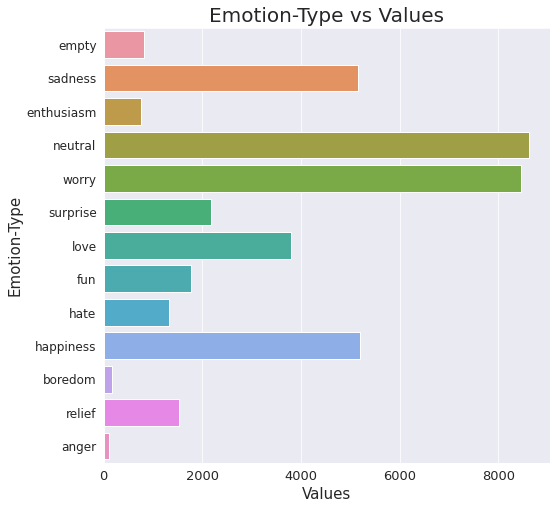

In [80]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.countplot(y= df.sentiment)
# plt.xticks(rotation=90)
plt.yticks(size=12)
plt.xticks(size=13)
plt.title("Emotion-Type vs Values", fontdict={'fontsize':20})
plt.xlabel("Values", fontdict={'fontsize':15})
plt.ylabel("Emotion-Type", fontdict={'fontsize':15})
plt.show()

#### Percentage of each Emotion

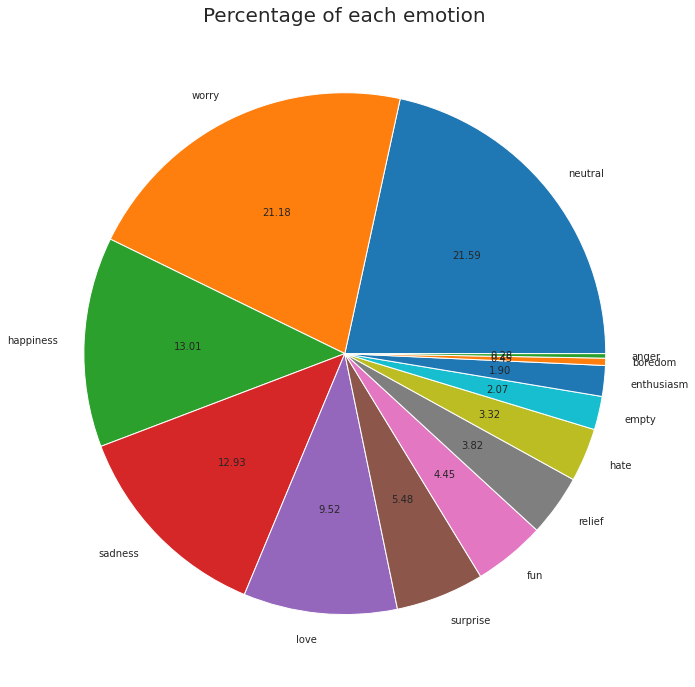

In [85]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))
plt.pie(df.sentiment.value_counts(), labels=df.sentiment.value_counts().index, autopct='%.2f')
plt.title("Percentage of each emotion", fontsize=20)
plt.show()

#### Distribution of Character Length in each tweet

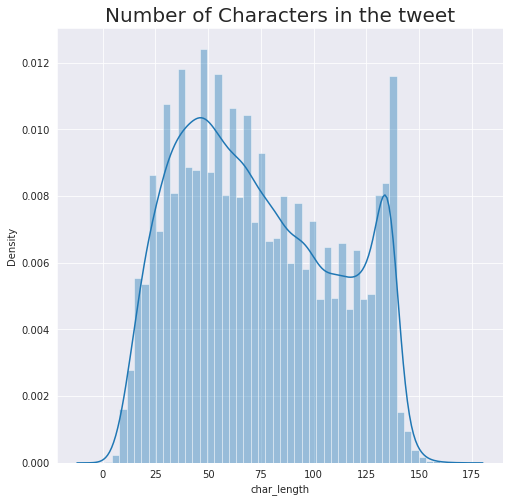

In [111]:
plt.figure(figsize=(8,8))
sns.distplot(df.char_length)
plt.title("Number of Characters in the tweet", fontsize=20)
plt.show()

#### Distribution of tokens/words in the tweet

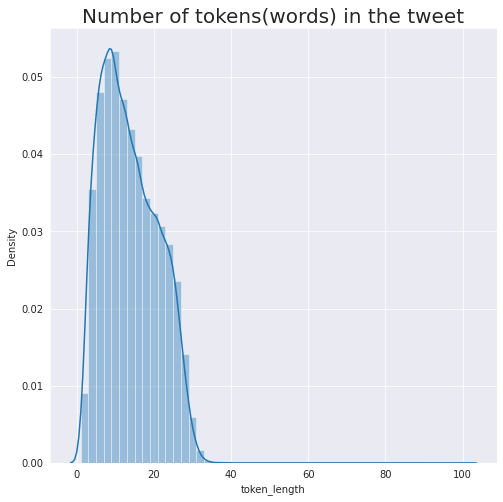

In [113]:
plt.figure(figsize=(8,8))
sns.distplot(df.token_length)
plt.title("Number of tokens(words) in the tweet", fontsize=20)
plt.show()

#### Distribution of top 5 emotions character-length wise

In [123]:
# First Method
df1 = df.groupby('sentiment')['char_length'].count().sort_values(ascending=False).head(5).reset_index()
df1

,sentiment,char_length
0,neutral,8617
1,worry,8452
2,happiness,5194
3,sadness,5160
4,love,3801


In [151]:
# second method
for sentiment in df.sentiment.value_counts().sort_values()[-5:].index.tolist():
    print(sentiment)

love
sadness
happiness
worry
neutral


In [154]:
# for sentiment in df.sentiment.value_counts().sort_values()[-5:].index.tolist():
#     print(df[df['sentiment']==sentiment]['char_length'])

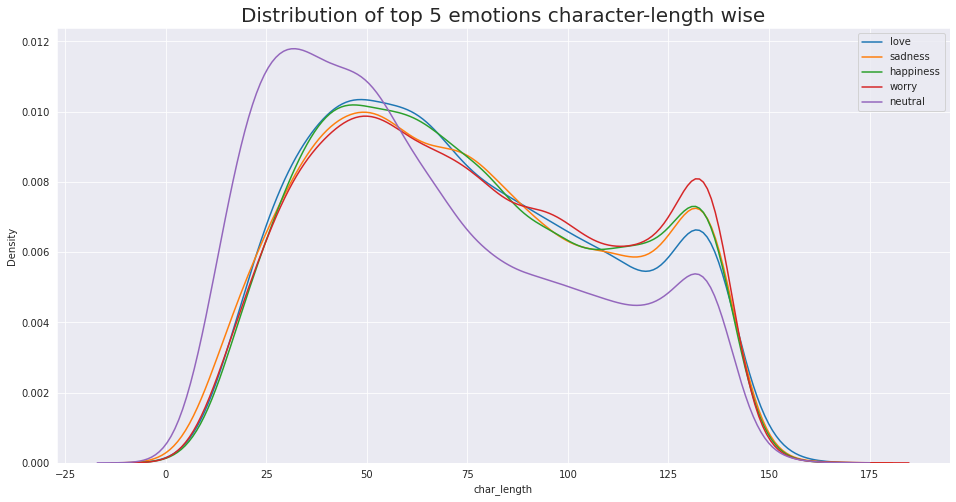

In [156]:
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in df['sentiment'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['sentiment']==sentiment]['char_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of top 5 emotions character-length wise", fontsize=20)
plt.show()

#### Distribution of top 5 emotions token-length wise

In [157]:
# First Method
df2 = df.groupby('sentiment')['token_length'].count().sort_values(ascending=False).head(5).reset_index()
df2

,sentiment,token_length
0,neutral,8617
1,worry,8452
2,happiness,5194
3,sadness,5160
4,love,3801


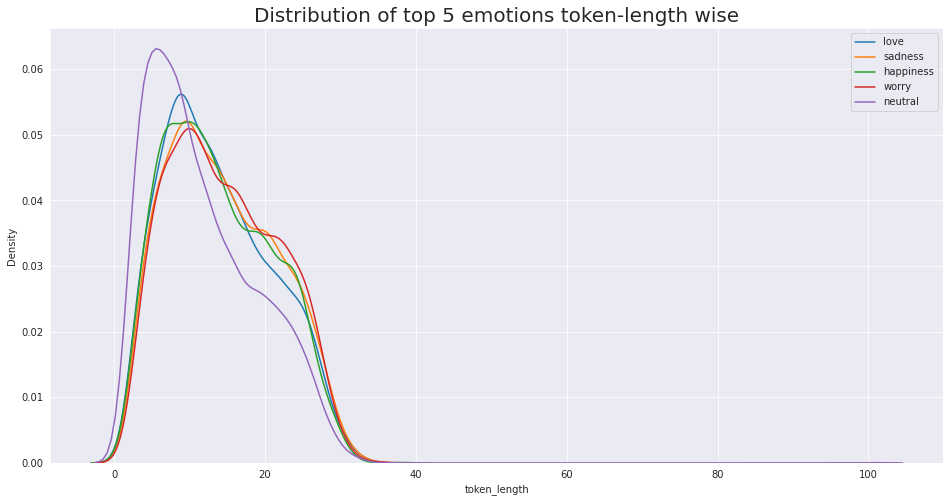

In [159]:
fig, ax = plt.subplots(figsize=(16,8))
for sentiment in df['sentiment'].value_counts().sort_values()[-5:].index.tolist():
    #print(sentiment)
    sns.kdeplot(df[df['sentiment']==sentiment]['token_length'],ax=ax, label=sentiment)
ax.legend()
ax.set_title("Distribution of top 5 emotions token-length wise", fontsize=20)
plt.show()

#### Average Length of each Tweet characters and Tokens wise

In [166]:
avg_df = df.groupby('sentiment').agg({'char_length':'mean', 'token_length':'mean'}).reset_index()
avg_df

,sentiment,char_length,token_length
0,anger,77.672727,14.645455
1,boredom,74.184358,13.988827
2,empty,64.604595,11.772672
3,enthusiasm,74.794466,13.859025
4,fun,81.302365,14.907095
5,happiness,75.677513,13.870042
6,hate,78.544974,14.772487
7,love,74.720337,13.774270
8,neutral,64.549727,11.726239
9,relief,76.505249,14.290026


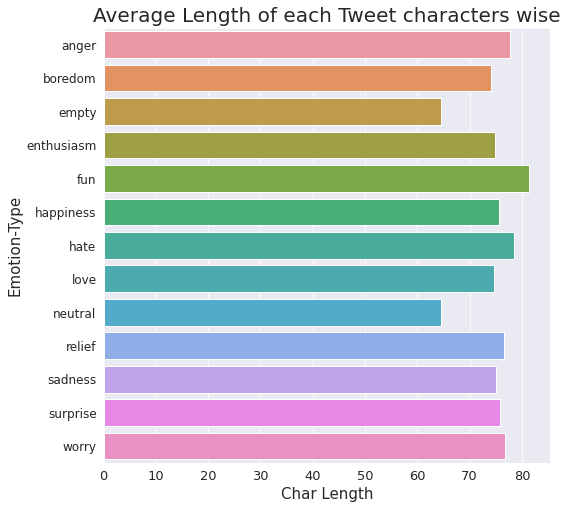

In [171]:
plt.figure(figsize=(8,8))
plt.yticks(size=12)
plt.xticks(size=13)
sns.barplot(y=avg_df.sentiment, x=avg_df.char_length)
plt.title("Average Length of each Tweet characters wise", fontdict={'fontsize':20})
plt.xlabel("Char Length", fontdict={'fontsize':15})
plt.ylabel("Emotion-Type", fontdict={'fontsize':15})
plt.show()

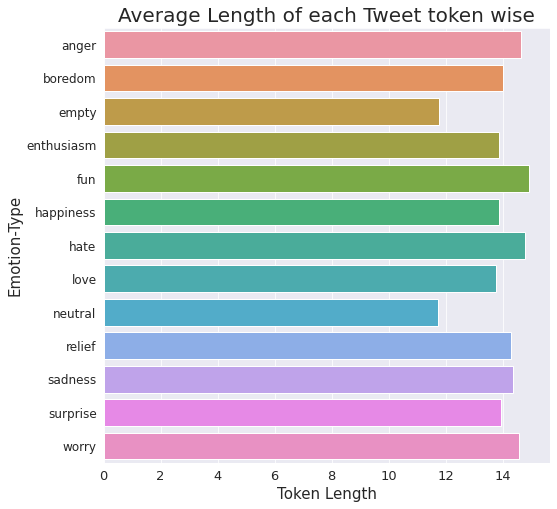

In [172]:
plt.figure(figsize=(8,8))
plt.yticks(size=12)
plt.xticks(size=13)
sns.barplot(y=avg_df.sentiment, x=avg_df.token_length)
plt.title("Average Length of each Tweet token wise", fontdict={'fontsize':20})
plt.xlabel("Token Length", fontdict={'fontsize':15})
plt.ylabel("Emotion-Type", fontdict={'fontsize':15})
plt.show()

### Text Preprocessing

#### Case Folding and Cleaning Data

In [176]:
import re
def clean_text(text):
#     removing the @mentions
    text = re.sub(r"@\w+|#\w+", "", text)
    
#     removing # hashtages from text
    text = re.sub(r"#","", text)
    
#     removing RT from text
    text = re.sub(r"RT[\s]+","", text)
    
#     removing hyperlinks from text
    text = re.sub(r"\w+:\/\/\S+","", text)
    
#     removing punctuation from the text
    text = re.sub(r"[^a-zA-Z]"," ", text)
    
#     convert text into lowercase
    text.lower()
    return text
    

In [177]:
df.content.apply(clean_text)

0         i know  i was listenin to bad habit earlier and i started freakin at his part                                             
1        Layin n bed with a headache  ughhhh   waitin on your call                                                                  
2        Funeral ceremony   gloomy friday                                                                                           
3        wants to hang out with friends SOON                                                                                        
4         We want to trade with someone who has Houston tickets  but no one will                                                    
                                           ...                                                                                      
39904                                                                                                                               
39905    Happy Mothers Day  All my love                              

In [179]:
# case folding
temp = df['content'].str.lower()
temp

0        @tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[                                        
1        layin n bed with a headache  ughhhh...waitin on your call...                                                                        
2        funeral ceremony...gloomy friday...                                                                                                 
3        wants to hang out with friends soon!                                                                                                
4        @dannycastillo we want to trade with someone who has houston tickets, but no one will.                                              
                                                  ...                                                                                        
39904    @johnlloydtaylor                                                                                                                    
39905 

In [180]:
# remove hashtag and mention using regex
import re
temp = temp.apply(lambda x: re.sub(r'@\w+|#\w+', '', x))
temp

0         i know  i was listenin to bad habit earlier and i started freakin at his part =[                                          
1        layin n bed with a headache  ughhhh...waitin on your call...                                                               
2        funeral ceremony...gloomy friday...                                                                                        
3        wants to hang out with friends soon!                                                                                       
4         we want to trade with someone who has houston tickets, but no one will.                                                   
                                           ...                                                                                      
39904                                                                                                                               
39905    happy mothers day  all my love                              

In [181]:
# remove url using regex
temp = temp.apply(lambda x: re.sub(r'http\S+', '', x))
temp

0         i know  i was listenin to bad habit earlier and i started freakin at his part =[                                          
1        layin n bed with a headache  ughhhh...waitin on your call...                                                               
2        funeral ceremony...gloomy friday...                                                                                        
3        wants to hang out with friends soon!                                                                                       
4         we want to trade with someone who has houston tickets, but no one will.                                                   
                                           ...                                                                                      
39904                                                                                                                               
39905    happy mothers day  all my love                              

In [182]:
# remove punctuation
import string
temp = temp.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
temp

0         i know  i was listenin to bad habit earlier and i started freakin at his part                                          
1        layin n bed with a headache  ughhhhwaitin on your call                                                                  
2        funeral ceremonygloomy friday                                                                                           
3        wants to hang out with friends soon                                                                                     
4         we want to trade with someone who has houston tickets but no one will                                                  
                                          ...                                                                                    
39904                                                                                                                            
39905    happy mothers day  all my love                                                   

In [183]:
# remove number
temp = temp.apply(lambda x: re.sub(r'\d+', '', x))
temp

0         i know  i was listenin to bad habit earlier and i started freakin at his part                                          
1        layin n bed with a headache  ughhhhwaitin on your call                                                                  
2        funeral ceremonygloomy friday                                                                                           
3        wants to hang out with friends soon                                                                                     
4         we want to trade with someone who has houston tickets but no one will                                                  
                                          ...                                                                                    
39904                                                                                                                            
39905    happy mothers day  all my love                                                   

In [185]:
# remove whitespace
temp = temp.apply(lambda x: x.strip())
temp

0        i know  i was listenin to bad habit earlier and i started freakin at his part                                          
1        layin n bed with a headache  ughhhhwaitin on your call                                                                 
2        funeral ceremonygloomy friday                                                                                          
3        wants to hang out with friends soon                                                                                    
4        we want to trade with someone who has houston tickets but no one will                                                  
                                         ...                                                                                    
39904                                                                                                                           
39905    happy mothers day  all my love                                                          

#### Stopwords Removal

In [191]:
stop = stopwords.words('english')
temp = temp.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
temp

0        know listenin bad habit earlier started freakin part                                   
1        layin n bed headache ughhhhwaitin call                                                 
2        funeral ceremonygloomy friday                                                          
3        wants hang friends soon                                                                
4        want trade someone houston tickets one                                                 
                          ...                                                                   
39904                                                                                           
39905    happy mothers day love                                                                 
39906    happy mothers day mommies woman man long youre momma someone day                       
39907    wassup beautiful follow peep new hit singles wwwmyspacecomipsohot def wat u video      
39908    bullet train tokyo gf

#### lemmatization


In [193]:
lemmatizer = WordNetLemmatizer()
temp = temp.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
temp

0        know listenin bad habit earlier started freakin part                                   
1        layin n bed headache ughhhhwaitin call                                                 
2        funeral ceremonygloomy friday                                                          
3        want hang friend soon                                                                  
4        want trade someone houston ticket one                                                  
                         ...                                                                    
39904                                                                                           
39905    happy mother day love                                                                  
39906    happy mother day mommy woman man long youre momma someone day                          
39907    wassup beautiful follow peep new hit single wwwmyspacecomipsohot def wat u video       
39908    bullet train tokyo gf

#### tokenization


In [195]:
temp = temp.apply(lambda x: word_tokenize(x))
temp

0        [know, listenin, bad, habit, earlier, started, freakin, part]                                      
1        [layin, n, bed, headache, ughhhhwaitin, call]                                                      
2        [funeral, ceremonygloomy, friday]                                                                  
3        [want, hang, friend, soon]                                                                         
4        [want, trade, someone, houston, ticket, one]                                                       
                             ...                                                                            
39904    []                                                                                                 
39905    [happy, mother, day, love]                                                                         
39906    [happy, mother, day, mommy, woman, man, long, youre, momma, someone, day]                          
39907    [wassup, b

In [196]:
# temp to df content_token
df['content_token'] = temp
df

,sentiment,content,char_length,token_length,content_token
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,92,19,"[know, listenin, bad, habit, earlier, started, freakin, part]"
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...,60,11,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,sadness,Funeral ceremony...gloomy friday...,35,3,"[funeral, ceremonygloomy, friday]"
3,enthusiasm,wants to hang out with friends SOON!,36,7,"[want, hang, friend, soon]"
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",86,15,"[want, trade, someone, houston, ticket, one]"
...,...,...,...,...,...
39904,neutral,@JohnLloydTaylor,16,1,[]
39905,love,Happy Mothers Day All my love,30,7,"[happy, mother, day, love]"
39906,love,"Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!",123,25,"[happy, mother, day, mommy, woman, man, long, youre, momma, someone, day]"
39907,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!,122,20,"[wassup, beautiful, follow, peep, new, hit, single, wwwmyspacecomipsohot, def, wat, u, video]"


In [197]:
df.isna().sum()

sentiment        0
content          0
char_length      0
token_length     0
content_token    0
dtype: int64

In [198]:
# remove NaN data in content_token
df = df.dropna(subset=['content_token'])
df

,sentiment,content,char_length,token_length,content_token
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,92,19,"[know, listenin, bad, habit, earlier, started, freakin, part]"
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...,60,11,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,sadness,Funeral ceremony...gloomy friday...,35,3,"[funeral, ceremonygloomy, friday]"
3,enthusiasm,wants to hang out with friends SOON!,36,7,"[want, hang, friend, soon]"
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",86,15,"[want, trade, someone, houston, ticket, one]"
...,...,...,...,...,...
39904,neutral,@JohnLloydTaylor,16,1,[]
39905,love,Happy Mothers Day All my love,30,7,"[happy, mother, day, love]"
39906,love,"Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!",123,25,"[happy, mother, day, mommy, woman, man, long, youre, momma, someone, day]"
39907,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!,122,20,"[wassup, beautiful, follow, peep, new, hit, single, wwwmyspacecomipsohot, def, wat, u, video]"


#### Finding & Removing Duplicate Synonim?

In [200]:
## Find synonym of each token.
from nltk.corpus import wordnet
def find_synonym(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return synonyms

df['synonym'] = df['content_token'].apply(lambda x: [find_synonym(word) for word in x])
df.head()

,sentiment,content,char_length,token_length,content_token,synonym
0,empty,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,92,19,"[know, listenin, bad, habit, earlier, started, freakin, part]","[[know, know, cognize, cognise, know, know, know, know, experience, live, acknowledge, recognize, recognise, know, know, sleep_together, roll_in_the_hay, love, make_out, make_love, sleep_with, get_laid, have_sex, know, do_it, be_intimate, have_intercourse, have_it_away, have_it_off, screw, fuck, jazz, eff, hump, lie_with, bed, have_a_go_at_it, bang, get_it_on, bonk, know, know, know], [], [bad, badness, bad, bad, big, bad, tough, bad, spoiled, spoilt, regretful, sorry, bad, bad, uncollectible, bad, bad, bad, risky, high-risk, speculative, bad, unfit, unsound, bad, bad, bad, forged, bad, defective, badly, bad, badly, bad], [habit, wont, habit, use, habit, habit, habit, riding_habit, substance_abuse, drug_abuse, habit, habit], [earlier, earliest, early, early, early, former, other, early, early, early, earlier, before, sooner, earlier, in_the_first_place, earlier, in_the_beginning, to_begin_with, originally], [get_down, begin, get, start_out, start, set_about, set_out, commence, begin, lead_off, start, commence, depart, part, start, start_out, set_forth, set_off, set_out, take_off, begin, start, originate, initiate, start, start, start_up, embark_on, commence, startle, jump, start, start, start_up, start, go, get_going, start, take_up, start, begin, start, begin, start, start, protrude, pop, pop_out, bulge, bulge_out, bug_out, come_out], [], [part, portion, component_part, component, constituent, part, portion, part, piece, part, region, part, function, office, part, role, character, role, theatrical_role, part, persona, share, portion, part, percentage, part, section, division, part, parting, part, voice, contribution, part, share, separate, part, split, separate, part, split_up, split, break, break_up, depart, part, start, start_out, set_forth, set_off, set_out, take_off, separate, divide, part, separate, disunite, divide, part, partially, partly, part]]"
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...,60,11,"[layin, n, bed, headache, ughhhhwaitin, call]","[[], [nitrogen, N, atomic_number_7, north, due_north, northward, N, newton, N, normality, N, N, n], [bed, bed, bed, bottom, bed, seam, bed, layer, bed, bed, bed, bed, bed, bed, sleep_together, roll_in_the_hay, love, make_out, make_love, sleep_with, get_laid, have_sex, know, do_it, be_intimate, have_intercourse, have_it_away, have_it_off, screw, fuck, jazz, eff, hump, lie_with, bed, have_a_go_at_it, bang, get_it_on, bonk, go_to_bed, turn_in, bed, crawl_in, kip_down, hit_the_hay, hit_the_sack, sack_out, go_to_sleep, retire], [concern, worry, headache, vexation, headache, head_ache, cephalalgia], [], [call, phone_call, telephone_call, Call, cry, outcry, call, yell, shout, vociferation, call, claim, birdcall, call, birdsong, song, call, margin_call, call, call, call, call, call, call, call_option, call, name, call, call, call, telephone, call_up, phone, ring, shout, shout_out, cry, call, yell, scream, holler, hollo, squall, call, send_for, visit, call_in, call, call, call, call, call, call, address, call, call, call, call_in, bid, call, call, call_off, call, predict, foretell, prognosticate, call, forebode, anticipate, promise, call, call, call, call, call, call, call, call, call, call]]"
2,sadness,Funeral ceremony...gloomy friday...,35,3,"[funeral, ceremonygloomy, friday]","[[funeral], [], [Friday, Fri]]"
3,enthusiasm,wants to hang out with friends SOON!,36,7,"[want, hang, friend, soon]","[[privation, want, deprivation, neediness, lack, deficiency, want, need, want, wish, wishing, want, desire, want, want, need, require, want, want, want], [bent, knack, hang, hang, hang, hang, hang, hang_up, hang, string_up, hang, hang, fall, flow, hang, attend, hang, advert, pay_heed, give_ear, hang, cling, hang, hang, hang, hang, hang, ha

#### Dictionary of word index


In [201]:
index_word = {}
for i, word in enumerate(df['content_token'].sum()):
    if word not in index_word:
        index_word[i] = word
words = [value for key, value in index_word.items()]
words

['know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'started',
 'freakin',
 'part',
 'layin',
 'n',
 'bed',
 'headache',
 'ughhhhwaitin',
 'call',
 'funeral',
 'ceremonygloomy',
 'friday',
 'want',
 'hang',
 'friend',
 'soon',
 'want',
 'trade',
 'someone',
 'houston',
 'ticket',
 'one',
 'repinging',
 'didnt',
 'go',
 'prom',
 'bc',
 'bf',
 'didnt',
 'like',
 'friend',
 'sleep',
 'im',
 'thinking',
 'old',
 'friend',
 'want',
 'he',
 'married',
 'damn',
 'amp',
 'want',
 'scandalous',
 'hmmm',
 'charlene',
 'love',
 'miss',
 'im',
 'sorry',
 'least',
 'friday',
 'cant',
 'fall',
 'asleep',
 'choked',
 'retainer',
 'ugh',
 'beat',
 'stupid',
 'song',
 'get',
 'next',
 'rude',
 'u',
 'watch',
 'hill',
 'london',
 'u',
 'realise',
 'tourture',
 'week',
 'week',
 'late',
 'watch',
 'itonlinelol',
 'got',
 'news',
 'storm',
 'electricity',
 'gone',
 'agreed',
 'sleepy',
 'even',
 'late',
 'fail',
 'lady',
 'gaga',
 'tweeted',
 'impressed',
 'video',
 'leaking',
 'know',
 'convinced',
 'al

#### set synonym dictionary using find_synonym function 


In [202]:
synonym_dict = {}
for word in words:
    synonym_dict.update({word : tuple([w.lower() for w in find_synonym(word)])})

synonym_dict

{'know': ('know',
  'know',
  'cognize',
  'cognise',
  'know',
  'know',
  'know',
  'know',
  'experience',
  'live',
  'acknowledge',
  'recognize',
  'recognise',
  'know',
  'know',
  'sleep_together',
  'roll_in_the_hay',
  'love',
  'make_out',
  'make_love',
  'sleep_with',
  'get_laid',
  'have_sex',
  'know',
  'do_it',
  'be_intimate',
  'have_intercourse',
  'have_it_away',
  'have_it_off',
  'screw',
  'fuck',
  'jazz',
  'eff',
  'hump',
  'lie_with',
  'bed',
  'have_a_go_at_it',
  'bang',
  'get_it_on',
  'bonk',
  'know',
  'know',
  'know'),
 'listenin': (),
 'bad': ('bad',
  'badness',
  'bad',
  'bad',
  'big',
  'bad',
  'tough',
  'bad',
  'spoiled',
  'spoilt',
  'regretful',
  'sorry',
  'bad',
  'bad',
  'uncollectible',
  'bad',
  'bad',
  'bad',
  'risky',
  'high-risk',
  'speculative',
  'bad',
  'unfit',
  'unsound',
  'bad',
  'bad',
  'bad',
  'forged',
  'bad',
  'defective',
  'badly',
  'bad',
  'badly',
  'bad'),
 'habit': ('habit',
  'wont',
  'habi

#### remove duplicate synonym


In [203]:
for key, value in synonym_dict.items():
    synonym_dict[key] = tuple(set(value))

synonym_dict

{'know': ('recognize',
  'roll_in_the_hay',
  'cognize',
  'be_intimate',
  'have_it_off',
  'hump',
  'eff',
  'sleep_with',
  'bonk',
  'have_a_go_at_it',
  'bang',
  'lie_with',
  'recognise',
  'sleep_together',
  'jazz',
  'screw',
  'make_love',
  'have_intercourse',
  'love',
  'fuck',
  'live',
  'have_it_away',
  'experience',
  'do_it',
  'cognise',
  'get_it_on',
  'acknowledge',
  'get_laid',
  'know',
  'make_out',
  'bed',
  'have_sex'),
 'listenin': (),
 'bad': ('unfit',
  'badly',
  'speculative',
  'spoiled',
  'high-risk',
  'sorry',
  'forged',
  'badness',
  'big',
  'bad',
  'uncollectible',
  'spoilt',
  'defective',
  'tough',
  'regretful',
  'risky',
  'unsound'),
 'habit': ('riding_habit',
  'drug_abuse',
  'wont',
  'use',
  'substance_abuse',
  'habit'),
 'earlier': ('former',
  'in_the_beginning',
  'other',
  'earlier',
  'early',
  'earliest',
  'before',
  'in_the_first_place',
  'to_begin_with',
  'originally',
  'sooner'),
 'started': ('bulge_out',
  '

#### remove null value in synonym_dict


In [204]:
synonym_dict = {k: v for k, v in synonym_dict.items() if v}

synonym_dict

{'know': ('recognize',
  'roll_in_the_hay',
  'cognize',
  'be_intimate',
  'have_it_off',
  'hump',
  'eff',
  'sleep_with',
  'bonk',
  'have_a_go_at_it',
  'bang',
  'lie_with',
  'recognise',
  'sleep_together',
  'jazz',
  'screw',
  'make_love',
  'have_intercourse',
  'love',
  'fuck',
  'live',
  'have_it_away',
  'experience',
  'do_it',
  'cognise',
  'get_it_on',
  'acknowledge',
  'get_laid',
  'know',
  'make_out',
  'bed',
  'have_sex'),
 'bad': ('unfit',
  'badly',
  'speculative',
  'spoiled',
  'high-risk',
  'sorry',
  'forged',
  'badness',
  'big',
  'bad',
  'uncollectible',
  'spoilt',
  'defective',
  'tough',
  'regretful',
  'risky',
  'unsound'),
 'habit': ('riding_habit',
  'drug_abuse',
  'wont',
  'use',
  'substance_abuse',
  'habit'),
 'earlier': ('former',
  'in_the_beginning',
  'other',
  'earlier',
  'early',
  'earliest',
  'before',
  'in_the_first_place',
  'to_begin_with',
  'originally',
  'sooner'),
 'started': ('bulge_out',
  'go',
  'jump',
  

In [205]:
import collections
value_occurrences = collections.Counter(synonym_dict.values())

filtered_synonym = {key: value for key, value in synonym_dict.items() if value_occurrences[value] == 1}

filtered_synonym

{'bad': ('unfit',
  'badly',
  'speculative',
  'spoiled',
  'high-risk',
  'sorry',
  'forged',
  'badness',
  'big',
  'bad',
  'uncollectible',
  'spoilt',
  'defective',
  'tough',
  'regretful',
  'risky',
  'unsound'),
 'habit': ('riding_habit',
  'drug_abuse',
  'wont',
  'use',
  'substance_abuse',
  'habit'),
 'earlier': ('former',
  'in_the_beginning',
  'other',
  'earlier',
  'early',
  'earliest',
  'before',
  'in_the_first_place',
  'to_begin_with',
  'originally',
  'sooner'),
 'started': ('bulge_out',
  'go',
  'jump',
  'commence',
  'set_forth',
  'start',
  'get_down',
  'get',
  'bug_out',
  'bulge',
  'pop_out',
  'set_out',
  'part',
  'start_out',
  'pop',
  'embark_on',
  'depart',
  'come_out',
  'take_off',
  'start_up',
  'lead_off',
  'protrude',
  'startle',
  'set_off',
  'initiate',
  'set_about',
  'take_up',
  'get_going',
  'begin',
  'originate'),
 'part': ('break',
  'constituent',
  'partially',
  'percentage',
  'share',
  'set_forth',
  'start',


#### Data Augmention by replacing words with synonyms using Spacy

In [206]:
## Function for augmenting data by replacing words with synonym using spaCy
import re
import random
sr = random.SystemRandom()
split_pattern = re.compile(r'\s+')
def data_augmentation(message, aug_range=1) :
    augmented_messages = []
    for j in range(0,aug_range) :
        new_message = ""
        for i in filter(None, split_pattern.split(message)) :
            new_message = new_message + " " + sr.choice(filtered_synonym.get(i,[i]))
        augmented_messages.append(new_message)
    return augmented_messages

In [207]:
tweet_count = df.sentiment.value_counts().to_dict()
tweet_count

{'neutral': 8617,
 'worry': 8452,
 'happiness': 5194,
 'sadness': 5160,
 'love': 3801,
 'surprise': 2187,
 'fun': 1776,
 'relief': 1524,
 'hate': 1323,
 'empty': 827,
 'enthusiasm': 759,
 'boredom': 179,
 'anger': 110}

In [209]:
# df

In [211]:
## Get max intent count to match other minority classes through data augmentation
import operator
max_intent_count = max(tweet_count.items(), key=operator.itemgetter(1))[1]
max_intent_count

8617

#### Balance Data
Because sentiment data is very far apart, such as neutral containing 8638 data, while anger as much as 110 data. We decided to balance the data to make the data fairer in terms of accuracy learning later. We use the Oversampling method, which means adding synthetic data that refers to the largest amount of data in the dataset.

In [212]:
import math
import tqdm
# tqdm is a library in Python which is used for creating Progress Meters or Progress Bars.
newdf = pd.DataFrame()
for intent, count in tweet_count.items() :
    count_diff = max_intent_count - count    ## Difference to fill
    multiplication_count = math.ceil((count_diff)/count)  ## Multiplying a minority classes for multiplication_count times
    if (multiplication_count) :
        old_message_df = pd.DataFrame()
        new_message_df = pd.DataFrame()
        for message in tqdm.tqdm(df[df["sentiment"] == intent]['content'].values) :
            ## Extracting existing minority class batch
            dummy1 = pd.DataFrame([message], columns=['content'])
            dummy1["sentiment"] = intent
            # concat existing minority class batch
            old_message_df = pd.concat([old_message_df, dummy1])

            ## Creating new augmented batch from existing minority class
            new_messages = data_augmentation(message,  multiplication_count)
            dummy2 = pd.DataFrame(new_messages, columns=['content'])
            dummy2["sentiment"] = intent
            # concat new augmented batch
            new_message_df = pd.concat([new_message_df, dummy2])

        ## Select random data points from augmented data
        new_message_df=new_message_df.take(np.random.permutation(len(new_message_df))[:count_diff])
        
        ## Merge existing and augmented data points using concat
        newdf = pd.concat([newdf, old_message_df, new_message_df])
        # newdf = newdf.append([old_message_df,new_message_df])
    else :
        newdf = pd.concat([newdf, df[df["sentiment"] == intent]])
        # newdf = newdf.append(df[df["Intent"] == intent])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 271.73it/s]


In [214]:
newdf.head(2)

,sentiment,content,char_length,token_length,content_token,synonym
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",86.0,15.0,"[want, trade, someone, houston, ticket, one]","[[privation, want, deprivation, neediness, lack, deficiency, want, need, want, wish, wishing, want, desire, want, want, need, require, want, want, want], [trade, trade, craft, trade, patronage, deal, trade, business_deal, craft, trade, trade_wind, trade, barter, swap, swop, trade, trade, merchandise, trade, trade_in, trade, trade, swap, swop, switch, deal, sell, trade], [person, individual, someone, somebody, mortal, soul], [Houston, Houston, Sam_Houston, Samuel_Houston], [ticket, tag, ticket, ticket, slate, ticket, ticket, just_the_ticket, ticket, fine, ticket], [one, 1, I, ace, single, unity, one, one, 1, i, ane, one, unitary, one, one, one, one, matchless, nonpareil, one, one_and_only, peerless, unmatched, unmatchable, unrivaled, unrivalled]]"
10,neutral,cant fall asleep,16.0,3.0,"[cant, fall, asleep]","[[buzzword, cant, bank, cant, camber, slang, cant, jargon, lingo, argot, patois, vernacular, cant, pious_platitude, bevel, cant, chamfer, cant, cant_over, tilt, slant, pitch], [fall, autumn, spill, tumble, fall, Fall, descent, declivity, fall, decline, declination, declension, downslope, fall, fall, downfall, fall, capitulation, fall, surrender, twilight, dusk, gloaming, gloam, nightfall, evenfall, fall, crepuscule, crepuscle, fall, pin, drop, fall, drop, dip, fall, free_fall, fall, descend, fall, go_down, come_down, fall, fall, come, precipitate, come_down, fall, fall, fall, fall, shine, strike, fall, fall, decrease, diminish, lessen, fall, fall, fall, fall, fall, fall, fall, fall, accrue, fall, fall, light, fall, return, pass, devolve, fall, fall, fall_down, fall, hang, fall, flow, fall, fall, fall, fall, fall, fall, fall, descend, settle], [asleep, asleep, benumbed, numb, asleep, at_peace, at_rest, deceased, departed, gone, asleep, asleep]]"


In [215]:
newdf.sentiment.value_counts()

neutral       8617
worry         8617
happiness     8617
sadness       8617
love          8617
surprise      8617
fun           8617
relief        8617
hate          8617
empty         8617
enthusiasm    8617
boredom       8617
anger         8617
Name: sentiment, dtype: int64

In [218]:
## Save newdf to csv file
newdf.to_csv('dataset/augmented_data.csv', index=False)
clean_df = pd.read_csv('dataset/augmented_data.csv')
clean_df.head(2)

,sentiment,content,char_length,token_length,content_token,synonym
0,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",86.0,15.0,"['want', 'trade', 'someone', 'houston', 'ticket', 'one']","[['privation', 'want', 'deprivation', 'neediness', 'lack', 'deficiency', 'want', 'need', 'want', 'wish', 'wishing', 'want', 'desire', 'want', 'want', 'need', 'require', 'want', 'want', 'want'], ['trade', 'trade', 'craft', 'trade', 'patronage', 'deal', 'trade', 'business_deal', 'craft', 'trade', 'trade_wind', 'trade', 'barter', 'swap', 'swop', 'trade', 'trade', 'merchandise', 'trade', 'trade_in', 'trade', 'trade', 'swap', 'swop', 'switch', 'deal', 'sell', 'trade'], ['person', 'individual', 'someone', 'somebody', 'mortal', 'soul'], ['Houston', 'Houston', 'Sam_Houston', 'Samuel_Houston'], ['ticket', 'tag', 'ticket', 'ticket', 'slate', 'ticket', 'ticket', 'just_the_ticket', 'ticket', 'fine', 'ticket'], ['one', '1', 'I', 'ace', 'single', 'unity', 'one', 'one', '1', 'i', 'ane', 'one', 'unitary', 'one', 'one', 'one', 'one', 'matchless', 'nonpareil', 'one', 'one_and_only', 'peerless', 'unmatched', 'unmatchable', 'unrivaled', 'unrivalled']]"
1,neutral,cant fall asleep,16.0,3.0,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber', 'slang', 'cant', 'jargon', 'lingo', 'argot', 'patois', 'vernacular', 'cant', 'pious_platitude', 'bevel', 'cant', 'chamfer', 'cant', 'cant_over', 'tilt', 'slant', 'pitch'], ['fall', 'autumn', 'spill', 'tumble', 'fall', 'Fall', 'descent', 'declivity', 'fall', 'decline', 'declination', 'declension', 'downslope', 'fall', 'fall', 'downfall', 'fall', 'capitulation', 'fall', 'surrender', 'twilight', 'dusk', 'gloaming', 'gloam', 'nightfall', 'evenfall', 'fall', 'crepuscule', 'crepuscle', 'fall', 'pin', 'drop', 'fall', 'drop', 'dip', 'fall', 'free_fall', 'fall', 'descend', 'fall', 'go_down', 'come_down', 'fall', 'fall', 'come', 'precipitate', 'come_down', 'fall', 'fall', 'fall', 'fall', 'shine', 'strike', 'fall', 'fall', 'decrease', 'diminish', 'lessen', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'accrue', 'fall', 'fall', 'light', 'fall', 'return', 'pass', 'devolve', 'fall', 'fall', 'fall_down', 'fall', 'hang', 'fall', 'flow', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'fall', 'descend', 'settle'], ['asleep', 'asleep', 'benumbed', 'numb', 'asleep', 'at_peace', 'at_rest', 'deceased', 'departed', 'gone', 'asleep', 'asleep']]"


<AxesSubplot:>

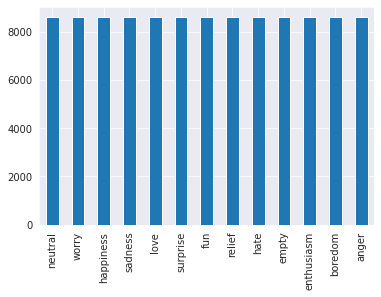

In [219]:
clean_df['sentiment'].value_counts().plot(kind='bar')

In [222]:
# cleaning the tweets using clean_tweet function
clean_df['clean_tweet'] = clean_df['content'].apply(lambda x: clean_text(x))

# lower casing clean_tweet column
clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: x.lower())

# function to remove stop words from clean_tweet column
def remove_stopwords(text):
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)

# stopword removal
clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: remove_stopwords(x))

clean_df.head(1)

,sentiment,content,char_length,token_length,content_token,synonym,clean_tweet
0,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",86.0,15.0,"['want', 'trade', 'someone', 'houston', 'ticket', 'one']","[['privation', 'want', 'deprivation', 'neediness', 'lack', 'deficiency', 'want', 'need', 'want', 'wish', 'wishing', 'want', 'desire', 'want', 'want', 'need', 'require', 'want', 'want', 'want'], ['trade', 'trade', 'craft', 'trade', 'patronage', 'deal', 'trade', 'business_deal', 'craft', 'trade', 'trade_wind', 'trade', 'barter', 'swap', 'swop', 'trade', 'trade', 'merchandise', 'trade', 'trade_in', 'trade', 'trade', 'swap', 'swop', 'switch', 'deal', 'sell', 'trade'], ['person', 'individual', 'someone', 'somebody', 'mortal', 'soul'], ['Houston', 'Houston', 'Sam_Houston', 'Samuel_Houston'], ['ticket', 'tag', 'ticket', 'ticket', 'slate', 'ticket', 'ticket', 'just_the_ticket', 'ticket', 'fine', 'ticket'], ['one', '1', 'I', 'ace', 'single', 'unity', 'one', 'one', '1', 'i', 'ane', 'one', 'unitary', 'one', 'one', 'one', 'one', 'matchless', 'nonpareil', 'one', 'one_and_only', 'peerless', 'unmatched', 'unmatchable', 'unrivaled', 'unrivalled']]",want trade someone houston tickets one


In [223]:
# function to lemmitize clean_tweet column
def lemmatization(text):
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)
clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: lemmatization(x))

# tokenization using word_tokenize
clean_df['clean_tweet_token'] = clean_df['clean_tweet'].apply(lambda x: word_tokenize(x))

clean_df.head(1)

,sentiment,content,char_length,token_length,content_token,synonym,clean_tweet,clean_tweet_token
0,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",86.0,15.0,"['want', 'trade', 'someone', 'houston', 'ticket', 'one']","[['privation', 'want', 'deprivation', 'neediness', 'lack', 'deficiency', 'want', 'need', 'want', 'wish', 'wishing', 'want', 'desire', 'want', 'want', 'need', 'require', 'want', 'want', 'want'], ['trade', 'trade', 'craft', 'trade', 'patronage', 'deal', 'trade', 'business_deal', 'craft', 'trade', 'trade_wind', 'trade', 'barter', 'swap', 'swop', 'trade', 'trade', 'merchandise', 'trade', 'trade_in', 'trade', 'trade', 'swap', 'swop', 'switch', 'deal', 'sell', 'trade'], ['person', 'individual', 'someone', 'somebody', 'mortal', 'soul'], ['Houston', 'Houston', 'Sam_Houston', 'Samuel_Houston'], ['ticket', 'tag', 'ticket', 'ticket', 'slate', 'ticket', 'ticket', 'just_the_ticket', 'ticket', 'fine', 'ticket'], ['one', '1', 'I', 'ace', 'single', 'unity', 'one', 'one', '1', 'i', 'ane', 'one', 'unitary', 'one', 'one', 'one', 'one', 'matchless', 'nonpareil', 'one', 'one_and_only', 'peerless', 'unmatched', 'unmatchable', 'unrivaled', 'unrivalled']]",want trade someone houston ticket one,"[want, trade, someone, houston, ticket, one]"


### Multi-Classification Models

In [224]:
from sklearn.model_selection import train_test_split

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(clean_df['clean_tweet_token'], clean_df['sentiment'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89616,), (22405,), (89616,), (22405,))

### TF-IDF

In [225]:
# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train.astype('U'))
X_test = vectorizer.transform(X_test.astype('U'))
X_train.shape, X_test.shape

((89616, 30899), (22405, 30899))

### Model Making

#### Model Multinomial Naive Bayes

In [226]:
# model training

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'The Results of the calculation of the accuracy of the Train Data : {acc_train}')
print(f'The Results of the calculation of the accuracy of the Test Data : {acc_test}')

The Results of the calculation of the accuracy of the Train Data : 0.7022964649169791
The Results of the calculation of the accuracy of the Test Data : 0.5686677081008703


### Model Evaluation

In [227]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

       anger       0.77      0.98      0.86      1714
     boredom       0.69      0.96      0.80      1684
       empty       0.72      0.58      0.64      1743
  enthusiasm       0.60      0.75      0.67      1729
         fun       0.60      0.58      0.59      1750
   happiness       0.41      0.37      0.39      1683
        hate       0.63      0.72      0.67      1655
        love       0.53      0.51      0.52      1783
     neutral       0.34      0.17      0.23      1750
      relief       0.55      0.59      0.57      1773
     sadness       0.44      0.32      0.37      1726
    surprise       0.59      0.43      0.50      1683
       worry       0.35      0.43      0.39      1732

    accuracy                           0.57     22405
   macro avg       0.55      0.57      0.55     22405
weighted avg       0.55      0.57      0.55     22405



In [229]:
cm = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix(y_test, y_pred_test))

[[1680    8    0    0    0    0    0    1    0   20    1    1    3]
 [   7 1620    7    8    2    2   17    3    1    5    7    0    5]
 [  50  129 1010  103   38   38  110   32   26   77   44   36   50]
 [  34   44   23 1305   21   41   40   53   21   62   32   19   34]
 [  46   58   37  106 1019  117   41   64   47   94   19   37   65]
 [  25   41   41   78  143  619   32  186   97  150   55   73  143]
 [  54   79   34   42   26   10 1198   12   15   50   39   27   69]
 [  37   34   39  100  105  164   45  907   49   91   60   55   97]
 [  57   60   63   83  107  188   98  131  305   81  124   70  383]
 [  31   87   30  122   59   67   36   90   39 1047   46   44   75]
 [  51   93   49   82   65   58  123   78   73   83  557   69  345]
 [  58   75   46  103   77   91   87  112   53   90   57  722  112]
 [  41   35   33   54   43  111   85   57  178   63  211   69  752]]


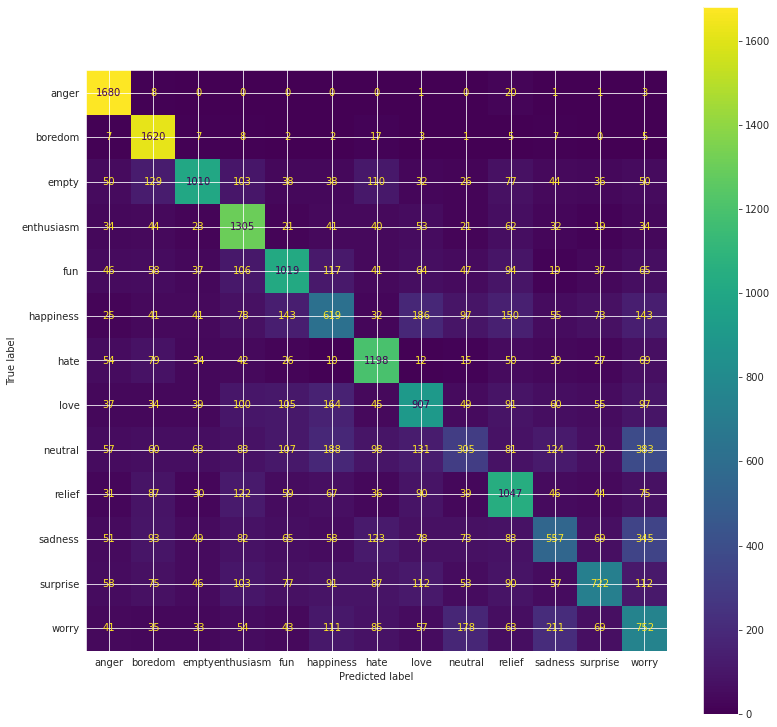

In [235]:
fig, ax = plt.subplots(figsize=(13,13))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
# ax.tick_params()
disp.plot(ax=ax);

#### Model Linear SVC

In [236]:
# Model using Linear SVC

from sklearn.svm import LinearSVC

# Inisiasi LinearSVC

lsvc = LinearSVC()

# Fit model
lsvc.fit(X_train, y_train)

y_pred_train = lsvc.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = lsvc.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)


print(f'The Results of the calculation of the accuracy of the Train Data : {acc_train}')
print(f'The Results of the calculation of the accuracy of the Test Data : {acc_test}')


The Results of the calculation of the accuracy of the Train Data : 0.8479847348687735
The Results of the calculation of the accuracy of the Test Data : 0.6568176746261996


#### Model Evaluation


In [237]:

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       anger       0.94      1.00      0.97      1714
     boredom       0.88      0.98      0.93      1684
       empty       0.70      0.77      0.73      1743
  enthusiasm       0.72      0.87      0.79      1729
         fun       0.68      0.73      0.70      1750
   happiness       0.50      0.42      0.46      1683
        hate       0.75      0.86      0.80      1655
        love       0.60      0.60      0.60      1783
     neutral       0.37      0.28      0.32      1750
      relief       0.65      0.70      0.67      1773
     sadness       0.50      0.41      0.45      1726
    surprise       0.62      0.61      0.61      1683
       worry       0.40      0.31      0.35      1732

    accuracy                           0.66     22405
   macro avg       0.64      0.66      0.65     22405
weighted avg       0.64      0.66      0.64     22405



In [240]:
cm = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix(y_test, y_pred_test))

[[1712    0    0    0    0    0    0    0    0    1    0    1    0]
 [   0 1651   10    1    2    0    6    1    1    3    5    1    3]
 [   4   23 1347   53   25   27   35    9   82   50   28   37   23]
 [   2    8   28 1503   17   21   20   15   25   34   19   20   17]
 [   3   11   41   64 1283   70   17   55   40   65   22   47   32]
 [   4   17   70   73  128  712   36  163  121  119   62   80   98]
 [   6   16   30   11   17   11 1420    9   21   23   36   26   29]
 [   7    8   50   59   83  140   36 1067   63   86   61   67   56]
 [  24   37  105   80  108  140   43  132  495   89  130  115  252]
 [   5   28   55   75   37   55   34   63   48 1244   46   46   37]
 [  12   42   82   62   53   64  108   87  121   68  716   97  214]
 [  12   15   55   62   64   60   57   86   80   56   47 1028   61]
 [  21   17   58   53   76  122   81   82  258   75  253   98  538]]


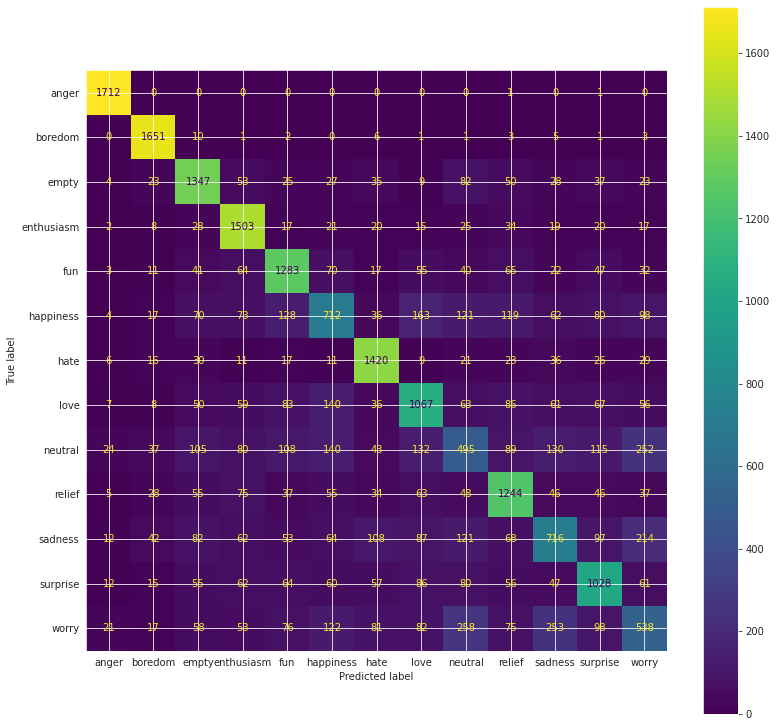

In [241]:
fig, ax = plt.subplots(figsize=(13,13))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lsvc.classes_)
# ax.tick_params()
disp.plot(ax=ax);

#### Model using Logistic Regression

In [242]:
# Model using Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = lr.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'The Results of the calculation of the accuracy of the Train Data : {acc_train}')
print(f'The Results of the calculation of the accuracy of the Test Data : {acc_test}')

The Results of the calculation of the accuracy of the Train Data : 0.7043608284234958
The Results of the calculation of the accuracy of the Test Data : 0.5733541620174069


#### Model Evaluation

In [243]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       anger       0.90      0.99      0.94      1714
     boredom       0.84      0.96      0.90      1684
       empty       0.62      0.69      0.65      1743
  enthusiasm       0.64      0.77      0.70      1729
         fun       0.54      0.56      0.55      1750
   happiness       0.38      0.32      0.35      1683
        hate       0.67      0.74      0.70      1655
        love       0.53      0.46      0.49      1783
     neutral       0.32      0.34      0.33      1750
      relief       0.55      0.56      0.55      1773
     sadness       0.42      0.30      0.35      1726
    surprise       0.49      0.44      0.46      1683
       worry       0.36      0.34      0.35      1732

    accuracy                           0.57     22405
   macro avg       0.56      0.57      0.56     22405
weighted avg       0.56      0.57      0.56     22405



In [244]:
cm = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix(y_test, y_pred_test))

[[1695    0    0    0    0    0    0    1    0   17    0    0    1]
 [   1 1613   16    5    6    3   17    1    4    3    7    4    4]
 [  15   41 1197   75   35   32   47   23  100   54   37   53   34]
 [   6   13   41 1332   35   35   26   39   52   54   32   39   25]
 [  13   19   68   96  988  116   36   75   89   97   25   78   50]
 [   6   15   71   89  171  536   30  167  200  142   52   95  109]
 [  23   31   47   30   35    8 1231   19   47   44   50   36   54]
 [  13   16   80   78  121  181   57  829  101   95   57   87   68]
 [  31   37  101   65  101  140   51  105  597   71  104   97  250]
 [   8   43   82   88   86   83   54   96   69  990   45   67   62]
 [  19   47   89   79   72   76  130   67  159   86  521  106  275]
 [  25   20   84   96   97   87   76   97  126   84   70  733   88]
 [  23   20   48   52   68   97   88   59  297   66  241   89  584]]


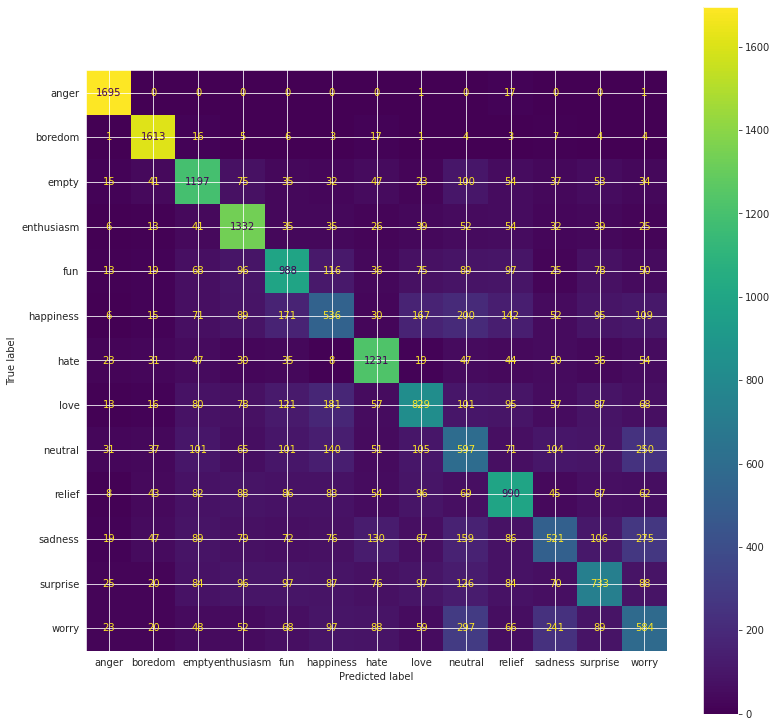

In [245]:
fig, ax = plt.subplots(figsize=(13,13))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
# ax.tick_params()
disp.plot(ax=ax);

In [246]:
new_tweet = "It is very important for us to work hard to achieve goals in life"